In [50]:
#Data Science Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy as sc

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [54]:
# View all of the classes that automap found
hawaii = Base.classes.keys()
hawaii

['station', 'measurement']

In [55]:
#Raw SQL
inspector_gadget = inspect(engine)
tables = inspector_gadget.get_table_names()

In [56]:
for table in tables:
    print (table)
    print("-------")

    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

measurement
-------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station
-------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [57]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station 

In [58]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
query = """
        SELECT
        MAX(date)
        FROM
        MEASUREMENT
        ;
        """
with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[('2017-08-23',)]


In [60]:
pd.read_sql_query(query, con=engine)

,MAX(date)
0,2017-08-23


In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query = """
        SELECT
            PRCP as percipitation,
            DATE,
            STATION
        FROM
            MEASUREMENT
        WHERE 
            DATE >= '2016-08-23'
        ORDER BY 
            DATE ASC
        ;
        """
df = pd.read_sql(text(query), con =engine)
df

,percipitation,date,station
0,0.00,2016-08-23,USC00519397
1,0.15,2016-08-23,USC00513117
2,0.05,2016-08-23,USC00514830
3,NaN,2016-08-23,USC00517948
4,0.02,2016-08-23,USC00519523
...,...,...,...
2225,0.50,2017-08-22,USC00516128
2226,0.00,2017-08-23,USC00519397
2227,0.00,2017-08-23,USC00514830
2228,0.08,2017-08-23,USC00519523


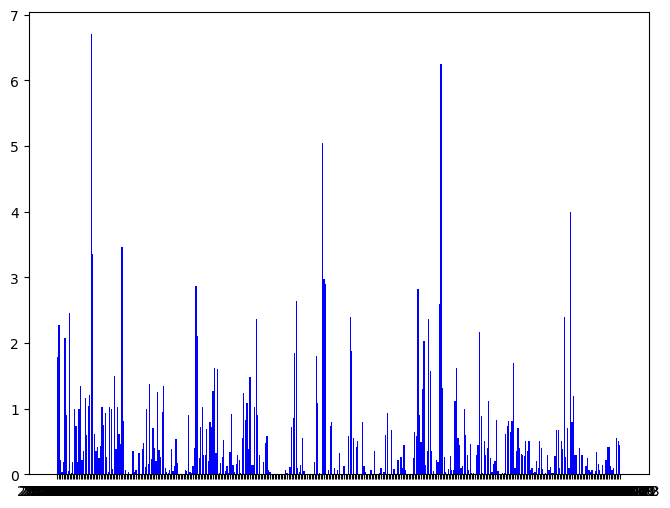

In [67]:
x = df.date
y = df.percipitation

plt.figure(figsize=(8,6))
plt.bar(x, y, color="blue")
plt.show()

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number of stations in the dataset
query = """
        SELECT
            COUNT(*) AS NUM_STATION
        FROM
            STATION
        ;
        """
with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[(9,)]


In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """
        SELECT
            STATION,
            COUNT(*) AS NUM_STATION
        FROM
            MEASUREMENT
        GROUP BY
            STATION
        ORDER BY
            NUM_STATION DESC
        ;
        """

df2 = pd.read_sql(text(query), con =engine)
df2

,station,NUM_STATION
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
        SELECT
            MIN(tobs) as Min_Temp,
            MAX(tobs) as Max_Temp,
            AVG(tobs) as Avg_Temp
        FROM
            MEASUREMENT
        WHERE
            STATION = 'USC00519281'
    
        ;
        """
pd.read_sql(text(query), con =engine)

,Min_Temp,Max_Temp,Avg_Temp
0,54.0,85.0,71.663781


In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
        SELECT
            tobs as TEMPERATURE
        FROM
            MEASUREMENT
        WHERE
            STATION = 'USC00519281'
            AND
            DATE >= '2016-08-23'
    
        ;
        """
df3 = pd.read_sql(text(query), con =engine)
df3

,TEMPERATURE
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [101]:
query =  """
                SELECT 
                    PRCP AS PERCIPITATION, 
                    DATE, 
                    STATION
                FROM 
                    MEASUREMENT 
                WHERE 
                    DATE >= '2016-08-23' 
                ORDER BY 
                    DATE ASC
                ;
                    """
pd.read_sql(text(query), con =engine)

,PERCIPITATION,date,station
0,0.00,2016-08-23,USC00519397
1,0.15,2016-08-23,USC00513117
2,0.05,2016-08-23,USC00514830
3,NaN,2016-08-23,USC00517948
4,0.02,2016-08-23,USC00519523
...,...,...,...
2225,0.50,2017-08-22,USC00516128
2226,0.00,2017-08-23,USC00519397
2227,0.00,2017-08-23,USC00514830
2228,0.08,2017-08-23,USC00519523


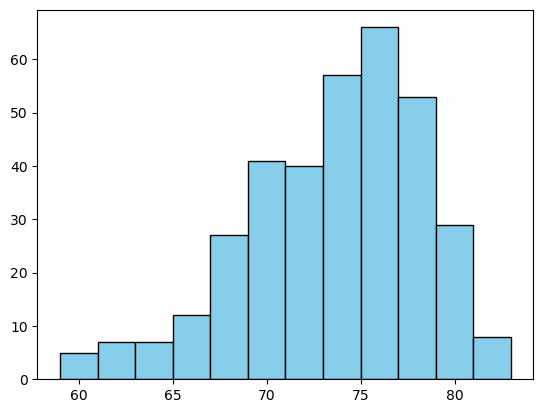

In [98]:


plt.hist(df3['TEMPERATURE'], bins=12, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()